# 1. Setup Mario

In [1]:
!pip install gym_super_mario_bros==7.3.0 nes_py

     |████████████████████████████████| 198 kB 4.6 MB/s            
     |████████████████████████████████| 76 kB 7.8 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 1.1 MB 49.8 MB/s            
  Created wheel for nes-py: filename=nes_py-8.1.8-cp37-cp37m-linux_x86_64.whl size=434186 sha256=7a9fd6e85f0b47335469bdcb417f1df10985d9d2511eafab35270842a273af3d
  Stored in directory: /home/jovyan/.cache/pip/wheels/f2/05/1f/608f15ab43187096eb5f3087506419c2d9772e97000f3ba025
Successfully built nes-py
  Attempting uninstall: pyglet
    Found existing installation: pyglet 1.5.23
    Uninstalling pyglet-1.5.23:
      Successfully uninstalled pyglet-1.5.23


In [1]:
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

In [2]:
!echo $DISPLAY

:0


In [3]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [4]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [5]:
env.action_space.sample()

1

In [6]:
env.observation_space.shape

(240, 256, 3)

In [7]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [8]:
from IPython import display
import matplotlib.pyplot as plt
# simulate agent interacting with the environment


In [9]:
done=True

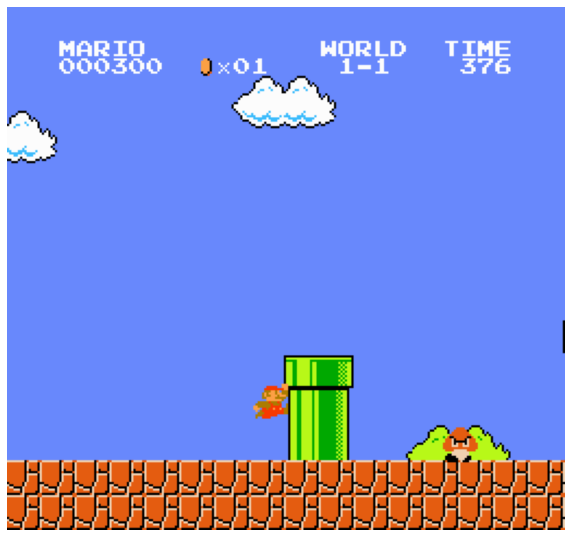

In [ ]:
#_, ax = plt.subplots(1, 1)
_, ax = plt.subplots(1, 1, figsize=(10,10))
img = ax.imshow(env.render(mode='rgb_array'))

# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100000): 
    # Start the game to begin with 
    if done: 
        # Start the gamee
        env.reset()
        img = ax.imshow(env.render(mode='rgb_array'))

    img.set_data(env.render(mode='rgb_array')) 
    ax.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    # env.render()
    
# Close the game
env.close()

# 2. Preprocess Environment

In [ ]:
# Install pytorch
!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [ ]:
# Install stable baselines for RL stuff
!pip install stable-baselines3[extra]

In [ ]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [ ]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [ ]:
state = env.reset()

In [ ]:
state, reward, done, info = env.step([5])

In [ ]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model

In [ ]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [ ]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [ ]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [ ]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [ ]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

In [ ]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=1000000, callback=callback)

In [ ]:
model.save('thisisatestmodel')

# 4. Test it Out

In [ ]:
# Load model
model = PPO.load('./train/best_model_1000000')

In [ ]:
state = env.reset()

In [ ]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

In [14]:
!conda list matplotlib

# packages in environment at /srv/conda/envs/notebook:
#
# Name                    Version                   Build  Channel
matplotlib                3.5.1                    pypi_0    pypi
matplotlib-inline         0.1.3              pyhd8ed1ab_0    conda-forge


In [13]:
!conda list gym-box2d

# packages in environment at /srv/conda/envs/notebook:
#
# Name                    Version                   Build  Channel
